# Forest future

In this notebook I will conclude whether world's forests are safe from disappearing or not. I will focus on future trends
and those areas, which I consider as the most important ones.


In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
import os

warnings.filterwarnings('ignore', category=FutureWarning)

In [38]:
forest_data = pd.read_csv('Forest_Area.csv')

forest_data.head()

,CountryID,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015-2020","Total Forest Area Affected by Fire, 2015"
0,1.0,WORLD,4236433.42,4158049.52,4106316.94,...,4058930.81,13003000.0,31.13,10200,98040
1,4.0,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286.0,1.85,...,...
2,8.0,Albania,788.80,769.30,782.07,789.19,788.90,2740.0,28.79,...,...
3,12.0,Algeria,1667.00,1579.00,1918.00,1956,1949.00,238174.0,0.82,5.4,...
4,16.0,American Samoa,18.07,17.73,17.43,17.28,17.13,20.0,85.65,...,0


We have got 233 different countries with data collected for the whole planet. Now it's time to replace the missing data and preprocess it to make it clearer for further analysis

In [39]:
forest_data.head()
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CountryID                                             237 non-null    float64
 1   Country and Area                                      237 non-null    object 
 2   Forest Area, 1990                                     237 non-null    float64
 3   Forest Area, 2000                                     237 non-null    float64
 4   Forest Area, 2010                                     237 non-null    float64
 5   Forest Area, 2015                                     237 non-null    object 
 6   Forest Area, 2020                                     237 non-null    float64
 7   Total Land Area, 2020                                 237 non-null    float64
 8   Forest Area as a Proportion of Total Land Area, 2020  237 no

In [53]:
forest_data['Forest Area, 2015'].fillna(forest_data['Forest Area, 2010'],  inplace = True)
for col in forest_data.columns[2:7]:
    forest_data[col] = pd.to_numeric(forest_data[col], errors='coerce')

forest_data.info()
#to check whether our values are really float or not
#print(forest_data['Forest Area, 2015'].unique())
#print(forest_data['Forest Area, 2015'].dtype)

for col in forest_data.columns[2:]:  
    forest_data[col] = pd.to_numeric(forest_data[col], errors='coerce')

# Obsłuż wartości NaN, np. zastąp średnią lub medianą, lub usuń wiersze zawierające NaN
forest_data.fillna(method='ffill', inplace=True) 
forest_data.replace([np.inf, -np.inf], np.nan, inplace=True)

forest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CountryID                                             237 non-null    float64
 1   Country and Area                                      237 non-null    object 
 2   Forest Area, 1990                                     237 non-null    float64
 3   Forest Area, 2000                                     237 non-null    float64
 4   Forest Area, 2010                                     237 non-null    float64
 5   Forest Area, 2015                                     237 non-null    float64
 6   Forest Area, 2020                                     237 non-null    float64
 7   Total Land Area, 2020                                 237 non-null    float64
 8   Forest Area as a Proportion of Total Land Area, 2020  237 no

,CountryID,Country and Area,"Forest Area, 1990","Forest Area, 2000","Forest Area, 2010","Forest Area, 2015","Forest Area, 2020","Total Land Area, 2020","Forest Area as a Proportion of Total Land Area, 2020","Deforestation, 2015-2020","Total Forest Area Affected by Fire, 2015"
0,1.0,WORLD,4236433.42,4158049.52,4106316.94,4106316.94,4058930.81,13003000.0,31.13,10200.0,98040.0
1,4.0,Afghanistan,1208.44,1208.44,1208.44,1208.44,1208.44,65286.0,1.85,10200.0,98040.0
2,8.0,Albania,788.80,769.30,782.07,789.19,788.90,2740.0,28.79,10200.0,98040.0
3,12.0,Algeria,1667.00,1579.00,1918.00,1956.00,1949.00,238174.0,0.82,5.4,98040.0
4,16.0,American Samoa,18.07,17.73,17.43,17.28,17.13,20.0,85.65,5.4,0.0


# Forestation future trends 
Now, after cleaning the data, let's show forestation trend over the countries

In [41]:
trend_colors = []

years = np.array([1990, 2000, 2010, 2015, 2020]).reshape(-1, 1)
world_forest_data = forest_data[forest_data['Country and Area'] == 'WORLD']
countries_forest_data = forest_data[forest_data['Country and Area'] != 'WORLD']

# Function to plot trend in afforestation in chosen country
def plot_country_forest_area(country):
    plt.figure(figsize=(10, 6))
    for index, row in forest_data.iterrows():
        if row['Country and Area'] == country:
            forest_area = pd.to_numeric(row[2:7], errors='coerce').values.reshape(-1, 1)
            model = np.polyfit(years.flatten(), forest_area.flatten(), 1)
            slope = model[0]  
            if slope < -0.1:
                trend_color = "red"
            elif -0.1 <= slope <= 0.1:
                trend_color = "grey"
            else:
                trend_color = "green"
            plt.plot(years.flatten(), row[2:7], label=row['Country and Area'], color=trend_color)
    plt.xlabel("Year")
    plt.ylabel("Forest Area (ha)")
    plt.title(f"Forest Area Change Over Time - {country}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# User's list with countries
country_dropdown = widgets.Dropdown(
    options=forest_data['Country and Area'].unique(),
    description='Country:',
    disabled=False,
)

# Interactive box to choose country
interact(plot_country_forest_area, country=country_dropdown)

<Figure size 1000x600 with 0 Axes>

interactive(children=(Dropdown(description='Country:', options=('WORLD', 'Afghanistan', 'Albania', 'Algeria', …

<function __main__.plot_country_forest_area(country)>

### Overall trend is negative, but in smaller countries it is probably reversed. Let's see if I'm right.

C:\Users\Tomek\AppData\Local\Temp\ipykernel_13152\699822295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_forest_data['Slope of Forest Area Trend (%)'] = ((countries_forest_data['Forest Area, 2020'] - countries_forest_data['Forest Area, 1990']) / countries_forest_data['Total Land Area, 2020']) * 100


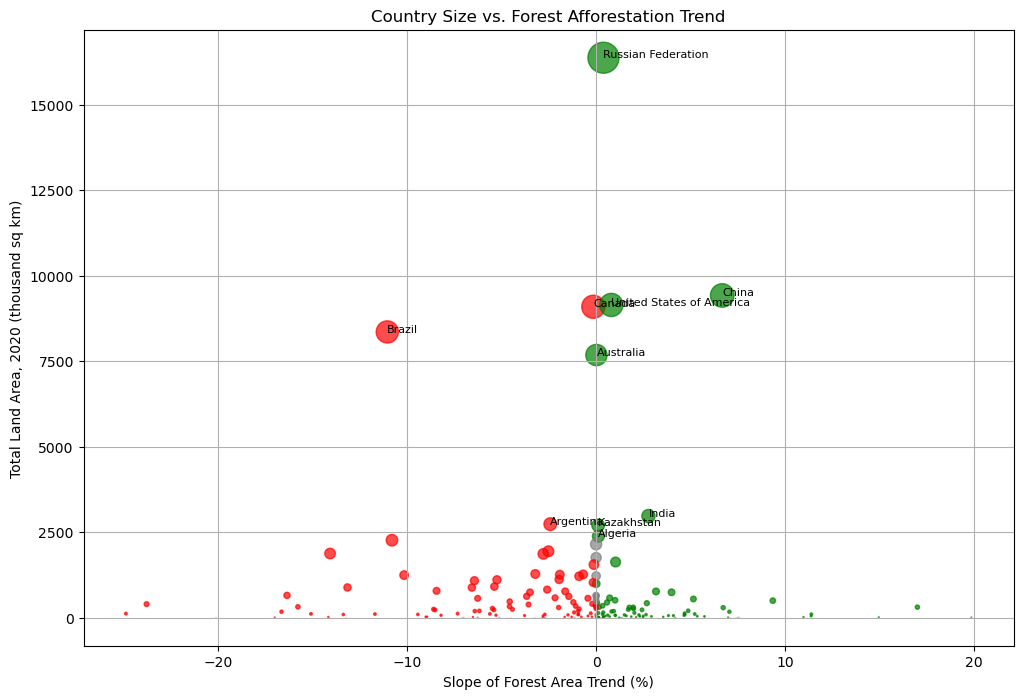

Korelacja pomiędzy nachyleniem trendu zalesienia a wielkością kraju: -0.011914498438777255


In [56]:
top_10_countries = countries_forest_data.nlargest(10, 'Total Land Area, 2020')

countries_forest_data['Slope of Forest Area Trend (%)'] = ((countries_forest_data['Forest Area, 2020'] - countries_forest_data['Forest Area, 1990']) / countries_forest_data['Total Land Area, 2020']) * 100

colors = np.where(countries_forest_data['Slope of Forest Area Trend (%)'] > 0, 'green', 
                  np.where(countries_forest_data['Slope of Forest Area Trend (%)'] < 0, 'red', 'grey'))

sizes = countries_forest_data['Total Land Area, 2020'] / countries_forest_data['Total Land Area, 2020'].max() * 500  # Skalowanie wielkości kropki

plt.figure(figsize=(12, 8))
plt.scatter(countries_forest_data['Slope of Forest Area Trend (%)'],
            countries_forest_data['Total Land Area, 2020']/100, 
            color=colors, alpha=0.7, s=sizes)

for i, txt in enumerate(top_10_countries['Country and Area']):
    plt.annotate(txt, (top_10_countries['Slope of Forest Area Trend (%)'].iloc[i], top_10_countries['Total Land Area, 2020'].iloc[i]/100), fontsize=8)

plt.ylabel('Total Land Area, 2020 (thousand sq km)')
plt.xlabel('Slope of Forest Area Trend (%)')
plt.title('Country Size vs. Forest Afforestation Trend')
plt.grid(True)
plt.show()

correlation = countries_forest_data[['Slope of Forest Area Trend (%)', 'Total Land Area, 2020']].corr().iloc[0, 1]
print("Korelacja pomiędzy nachyleniem trendu zalesienia a wielkością kraju:", correlation)


# Future of forests
Now it's time to predict the future of our forests using linear regression, as the trend seems to be quite linear.

In [57]:
future_years = np.array([2021, 2025, 2030, 2035, 2040, 2045, 2050]).reshape(-1, 1)  

predictions = {}

for index, row in countries_forest_data.iterrows():
    country_name = row['Country and Area']
    forest_area = row[['Forest Area, 1990', 'Forest Area, 2000', 'Forest Area, 2010', 'Forest Area, 2015', 'Forest Area, 2020']].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(years, forest_area)

    predicted_forest_area = model.predict(future_years).flatten()
    predictions[country_name] = predicted_forest_area

predictions_df = pd.DataFrame(predictions, index=future_years.flatten())

print(predictions_df.head())

      Afghanistan     Albania      Algeria  American Samoa  Andorra  \
2021      1208.44  786.566172  1991.141379       17.091586     16.0   
2025      1208.44  787.398793  2041.810345       16.966897     16.0   
2030      1208.44  788.439569  2105.146552       16.811034     16.0   
2035      1208.44  789.480345  2168.482759       16.655172     16.0   
2040      1208.44  790.521121  2231.818966       16.499310     16.0   

            Angola  Anguilla  Antigua and Barbuda     Argentina     Armenia  \
2021  66892.952379       5.5             8.052207  27980.341379  328.264759   
2025  65141.255345       5.5             7.786552  27033.810345  327.430690   
2030  62951.634052       5.5             7.454483  25850.646552  326.388103   
2035  60762.012759       5.5             7.122414  24667.482759  325.345517   
2040  58572.391466       5.5             6.790345  23484.318966  324.302931   

      ...      Uruguay   Uzbekistan  Vanuatu  \
2021  ...  2144.533448  3759.141069    442.3   
20

Visualize these trends

In [58]:
output_dir = "prediction_charts"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for country in predictions_df.columns:
    plt.figure(figsize=(10, 6))
    future_years = predictions_df.index.tolist()
    historical_forest_area = countries_forest_data.loc[countries_forest_data['Country and Area'] == country,
    ['Forest Area, 1990', 'Forest Area, 2000', 'Forest Area, 2010', 'Forest Area, 2015', 'Forest Area, 2020']].values.flatten()
    
    plt.plot(years, historical_forest_area, label='Historical Data', marker='o')
   
    plt.plot(future_years, predictions_df[country], label='Predictions', linestyle='--', marker='x')

    confidence_interval = predictions_df[country].std()  
    upper_bound = predictions_df[country] + confidence_interval
    lower_bound = predictions_df[country] - confidence_interval
    
    # Drawing confidence_interval
    plt.fill_between(future_years, lower_bound, upper_bound, color='orange', alpha=0.15, label='Confidence interval')
    
    plt.title(f'Forest Area Predictions for {country}')
    plt.xlabel('Year')
    plt.ylabel('Forest Area (ar)')
    plt.legend()
    plt.grid(True)
    
    # Saving predictions to file, all predictions can be seen in prediction_charts folder
    filename = f"{output_dir}/{country}".replace(" ", "_").replace(",", "")
    plt.savefig(filename)
    plt.close()  

C:\Users\Tomek\AppData\Local\Temp\ipykernel_13152\337112349.py:30: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig(filename)


You can now go into prediction_charts folder to look at all predictions and look at the chosen country to see its predicted trend of afforestation.
Last thing I'm going to do is to validate my model using R^2 parameter.

In [60]:
from sklearn.metrics import r2_score

y_true = historical_forest_area
y_pred = predictions_df[country].values

y_pred = y_pred[:-2] #to fit R^2 score

r_squared = r2_score(y_true, y_pred)
print("R squared:", r_squared)

R squared: -3.803448275862123
